# Debugging

Nada más clásico que correr un código y que salga un mensaje de error. Y nada peor que el mensaje de error aparezca luego de largos minutos de espera. Aquí aprenderemos a utilizar técnicas básicas de debugging y además a usar tres herramientas que nos podrán ayudar aún más a encontrar errores de manera rápida y eficaz. Los erroes vienen de muchas maneras, desde simples typos o erroes en el orden de las lineas, hasta loops infinitos y listas vacías. 

Para muchos casos, python mostrará un mensaje que apuntará directamente a donde está el error. Por eso lo primero será leer con atención el mensaje, buscar y corregir el error. 
Aquí un ejemplo sencillo con varios errores de diferente tipo para que lo corrigas.

In [8]:
a = 2
b = '2'
print(a+b)
print(a+b+c)
c = 3

while True print('Hello world")

SyntaxError: invalid syntax (<ipython-input-8-c7d9a769dfde>, line 7)

Los buenos mensajes de error te dirán exactamente qué ha ido mal y dónde ha ocurrido, pero es muy difícil escribir mensajes de error que sean útiles en todas las situaciones. Esto sucederá especialmente cuando estamos usando una función proveniente de algún paquete. Cuando te encuentres con un mensaje de error que no entiendas, es una buena práctica buscarlo en Google (literalmente, sólo tienes que copiar el mensaje de error y pegarlo en Google) para ver si alguien más se ha encontrado con ese error. StackOverflow es especialmente útil. Pruébalo con el siguiente mensaje de error, y corrige el código para que te dé la fuerza electrostática en Dinas.

In [9]:
from astropy import units as u, constants as cst

# calcular la fuerza electrostatica entre un proton y un electron
force = cst.e**2 / (1 * u.angstrom)**2

TypeError: Constant 'e' does not have physically compatible units across all systems of units and cannot be combined with other values without specifying a system (eg. e.emu)

Otra buena practica para estos casos sería buscar la documentación del paquete y leer con cuidado cómo llamar a cada función o variable.

   _______________________________________________________________________________________________________

Ahora claro, los errores realmente problematicos son cuando el código parece correr sin problemas pero el resultado no tienen sentido. Puede ser quizá que la imagen que querías hacer aparece vacía, que se queda en un loop infinito o que una matriz de numeros termina con un solo elemento. Estos erroes más complejos tendrémos que atacarlos de manera distinta.

## Tecnicas básicas de debuggin para cualquier interfaz

Lo primero que podemos hacer es revisar el código manualmente imprmiendo variables intermedias. Esto puede ayudar si el error es relativamente sencillo, pero suele ser muy ineficiente ya que implica correr el código muchas veces. 

## PDB: The Python Debugger¶

Este modulo nos permite debuggiar un código directamente desde la terminal. Esto puede ser especialmente útil al trabajar con una conexión remota, pero puede parecer algo hostil para usos más cotidianos.

## VS Code Debugger

VS Code es de las herramientas más utilizadas para programar, y una de sus maravillas es el debugger que viene incluido. Es bastante intuitivo su uso e interactivo. Será una ayuda perfecta a la hora de encontrar bugs.


## PyCharm Debugger

PyCharm, también muy común, trae intergrado un debugger. 

In [4]:
import numpy as np
import orbitize.kepler as kepler

ra, dec, rv = kepler.calc_orbit(np.array([1000, 1e6, -12]), 10.0, 0.1, -1, 1000, 0, 0.5, 100, -99)

print(ra, dec, rv)
assert np.all(np.isfinite(ra))
assert np.all(np.isfinite(dec))
assert np.all(np.isfinite(rv))

ModuleNotFoundError: No module named 'orbitize'

El siguiente código genrea una animación que ilustra el problema del doble péndulo. Pero, el código está roto. 

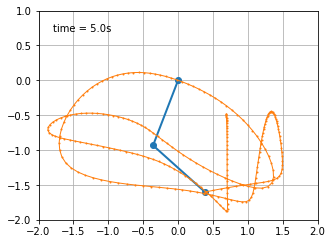

In [1]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 5  # how many seconds to simulate
history_len = 500  # how many trajectory points to display


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
                / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
                / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
trace, = ax.plot([], [], '.-', lw=1, ms=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    if i == 0:
        history_x.clear()
        history_y.clear()

    history_x.appendleft(thisx[2])
    history_y.appendleft(thisy[2])

    line.set_data(thisx, thisy)
    trace.set_data(history_x, history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text


ani = animation.FuncAnimation(fig, animate, len(y), interval=dt*1000, blit=True)

from IPython.display import HTML
HTML(ani.to_html5_video())

La siguiente animación muestra cómo se va actualizando la estimación a posteriori en un sistema Bayesiano a medida que se reajusta cuando llegan nuevos datos. La línea vertical representa el valor teórico al que debería converger la distribución dibujada.

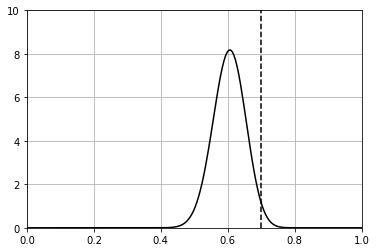

In [3]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))


class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=100, interval=100, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

# Por un codigo fácil de entender y usar


Nada peor que te pasen un código y tener que pasar horas tratando de entender qué hace cada función, qué es cada variable y qué tengo que hacer para usarlo. Peor aún cuando el código es tuyo pero de hace 5 meses y ya no logras descifrar para qué era. Para evitar problemas tan típicos como este, podemos seguir unas cuantas reglas que nos ayudaran a tener codigos ordenados, funcionales y user-friendly.

Una de las convenciones más usadas es PEP8, odiada por muchos, amada por otros tantos. Seguir todas las reglas o recomendaciones al pie de la letra es tedioso y laborioso, pero hay algunas piezas claves que deberemos adoptar, especialmente si queremos crear un paquete que esté disponible para que más gente lo use.

Las dos piezas claves que veremos son el uso de comentarios y Docstrings.


Los comentarios que contradicen el código son peores que la ausencia de comentarios. Es prioritario mantener los comentarios actualizados cuando el código cambia. 


un código se lee mucho más seguido de lo que se escribe.  La coherencia con una guía de estilo es importante. La coherencia dentro de un proyecto es más importante. La coherencia dentro de un módulo o función es lo más importante.

Para más detalles sobre PEP8 visita https://peps.python.org/pep-0008/#:~:text=Use%20the%20function%20naming%20rules,invoke%20Python's%20name%20mangling%20rules.